# C2W4
## Решающие деревья

Первый урок по рещающим деревьям

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

from matplotlib.colors import ListedColormap

from sklearn import datasets, model_selection, metrics, tree


%matplotlib inline

/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Generation toy data

In [2]:
classification_problem = datasets.make_classification(n_features=2, n_informative=2,\
                                                     n_classes=3, n_redundant=0, n_clusters_per_class=1,
                                                     random_state=0)

In [4]:
colors=ListedColormap(['green', 'blue', 'red'])

light_colors = ListedColormap(['lightyellow', 'lightgreen', 'lightcoral'])

In [27]:
classification_problem[0][:10]

array([[ 0.12041909, -1.68941375],
       [ 1.09665605,  1.79445113],
       [ 0.88426577,  1.43370121],
       [ 0.95048011, -0.56202253],
       [ 1.04421447,  0.02899023],
       [ 0.50102164, -1.27508231],
       [ 1.10447379,  0.35117341],
       [-2.5077599 ,  2.48857017],
       [-0.00811816,  0.11564734],
       [ 0.31338067, -0.87926516]])

In [37]:
[x[0] for x in classification_problem[0]]

[0.12041909133795903,
 1.0966560501920106,
 0.8842657677773155,
 0.9504801123771934,
 1.0442144720383355,
 0.5010216351026264,
 1.104473791055926,
 -2.5077599004831708,
 -0.00811815766831625,
 0.3133806659361569,
 -0.046877475804735114,
 1.2088889821652882,
 1.7117300074560142,
 1.2967080804064262,
 1.2418899561079297,
 -1.7827382154867717,
 -1.505141465791385,
 0.8716398875000242,
 2.530269084921403,
 0.9500036754107359,
 -1.5371644824583068,
 -2.1365085488245463,
 1.0103778829203267,
 1.9876466987502077,
 1.1246349676118002,
 -0.6512227888382562,
 0.85144036205131,
 -0.10789456676958853,
 -0.41699943957372354,
 -0.7799300261798354,
 2.341376260856668,
 0.7962582402668705,
 1.3641878049920808,
 0.04699454855271057,
 0.7727443327252768,
 -1.2097102079438988,
 -1.632817392094593,
 1.7957459076734437,
 0.8951838770205742,
 -2.1121329741692842,
 -1.2181522624172572,
 1.232406436289369,
 0.7426160615751836,
 2.406205156499104,
 -1.6876574324327382,
 1.2356714816573484,
 1.0892175508257465,

In [42]:
lambda x: x[0], classification_problem[0]

(<function __main__.<lambda>(x)>,
 array([[ 0.12041909, -1.68941375],
        [ 1.09665605,  1.79445113],
        [ 0.88426577,  1.43370121],
        [ 0.95048011, -0.56202253],
        [ 1.04421447,  0.02899023],
        [ 0.50102164, -1.27508231],
        [ 1.10447379,  0.35117341],
        [-2.5077599 ,  2.48857017],
        [-0.00811816,  0.11564734],
        [ 0.31338067, -0.87926516],
        [-0.04687748,  1.35489986],
        [ 1.20888898,  0.64232637],
        [ 1.71173001, -1.04637674],
        [ 1.29670808, -0.6054158 ],
        [ 1.24188996, -0.3819388 ],
        [-1.78273822,  1.52817583],
        [-1.50514147,  1.27186707],
        [ 0.87163989, -0.42276158],
        [ 2.53026908, -1.61974843],
        [ 0.95000368,  1.83240861],
        [-1.53716448, -0.89497353],
        [-2.13650855,  2.73389996],
        [ 1.01037788,  0.59402713],
        [ 1.9876467 , -0.22375521],
        [ 1.12463497,  2.13646176],
        [-0.65122279,  0.97865617],
        [ 0.85144036,  0.42548

In [8]:
(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]))

(<map at 0x7fd07fa20190>, <map at 0x7fd07fa202d0>)

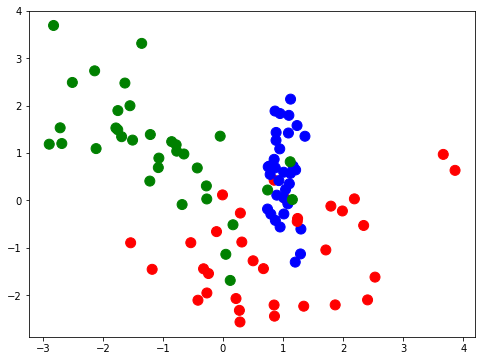

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])),
           c=classification_problem[1], cmap=colors, s=100)

## Train-test splitting

In [44]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(classification_problem[0],
                                                                    classification_problem[1],
                                                                    test_size=0.3,
                                                                    random_state=1)

In [45]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

metrics.accuracy_score(y_test, clf.predict(X_test))

0.6666666666666666

In [56]:
# def get_meshgrid(data, step=.05, border=.5):
#     x_min, x_max = data[:, 0].min() - border, data[:, 0].max()+border
#     y_min, y_max = data[:, 1].min() - border, data[:, 1].max()+border
#     return np.meshgrid(np.arange(x_min, x_max, step)), np.arange(y_min, y_max, step)

def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max()+border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max()+border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
# def get_meshgrid(data, step=.05, border=.5,):
#     x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
#     y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
#     return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


In [65]:
def plot_decision_surface(estimator, X_train, y_train, X_test, y_test,
                          colors=colors, light_colors=light_colors):
    estimator.fit(X_train, y_train)
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(X_train)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx,yy,mesh_predictions, cmap=light_colors)
    
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=100, cmap=colors)
    plt.title(f'Train data, accuracy={metrics.accuracy_score(y_train, estimator.predict(X_train))}')
    
    
    plt.subplot(1,2,2)
    plt.pcolormesh(xx,yy,mesh_predictions, cmap=light_colors)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=100, cmap=colors)
    plt.title(f'Test data, accuracy={metrics.accuracy_score(y_test, estimator.predict(X_test))}')
    
    
    

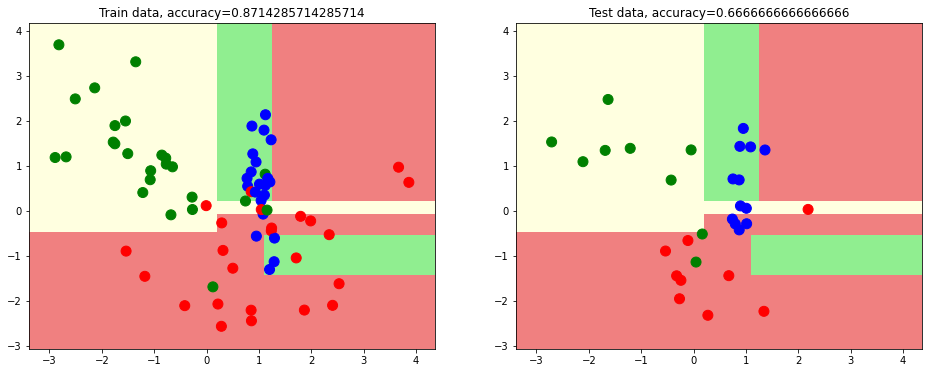

In [72]:
estimator = tree.DecisionTreeClassifier(random_state=10, min_samples_leaf=3)

plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

Критерии информативности 

$S=-\sum_{i=1}^{N} p_{i} \log _{2} p_{i}$

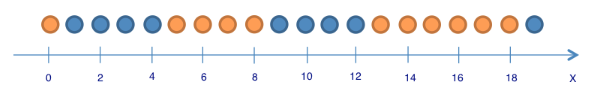

In [82]:
S = -(10/20)*np.log2(10/20)-(10/20)*np.log2(10/20)
print(S)

1.0


In [85]:
-np.log2(10/20)*(10/20) - (10/20)*np.log2(10/20)

1.0

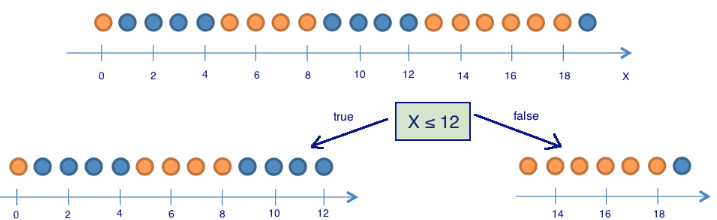

In [86]:
def entropy(X, y):
    return -(X[0]/y)*np.log2(X[0]/y)-(X[1]/y)*np.log2(X[1]/y) 

In [90]:
def IG(X):
    X_leaf_sum = 0
    for i in range(1, len(X)):
        X_leaf_sum += X[i]
    return X[0] - X_leaf_sum

In [92]:
IG([S0, Sl, Sr])

-0.9296987554579434

In [93]:
Sr = -(8/13)*np.log2(8/13)-(5/13)*np.log2(5/13) 

Sl = -(8/13)*np.log2(8/13)-(5/13)*np.log2(5/13) 

S0 = -(9/20)*np.log2(9/20)-(11/20)*np.log2(11/20)

In [94]:
S0 - Sl- Sr

-0.9296987554579434

/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """
/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


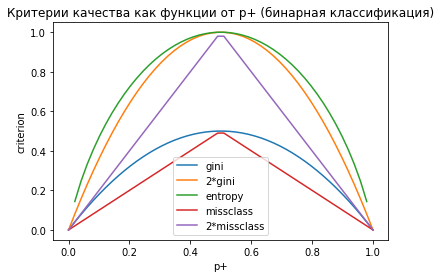

In [95]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от p+ (бинарная классификация)')
plt.legend();

In [107]:
def Gini(X):
    return sum([x*(1-x) for x in X ])

In [104]:
X = [1,2,3]
[x*(x-1) for x in X]

[0, 2, 6]

In [109]:
X = [.9, .07, .03]
Gini(X)

0.18419999999999997